In [91]:
import pandas as pd

# Loading L2R evaluation
evalL2R = pd.read_csv('testEvalL2R.txt', delimiter='\t', names=['metric', 'qid', 'value'])
evalL2R['model'] = 'L2R'

# Loading BM25 evaluation
evalBM25 = pd.read_csv('BM25BaseLineEval.txt', delimiter='\t', names=['metric', 'qid', 'value'])
evalBM25['model'] = 'BM25'

data = evalL2R.append(evalBM25)

# Removing summary statistics
data = data[data['qid'] != 'all']

# Select MAP scores
data = data[data['metric'] == 'map                   ']

# Removing metric column
data = data[['model', 'qid', 'value']]

# Renaming value to MAP
data.columns = ['model', 'qid', 'map']

# Converting qid and MAP score to numeric
data[['qid', 'map']] = data[['qid', 'map']].apply(pd.to_numeric)

print(data.head())

   model      qid     map
0    L2R  1037798  0.1518
8    L2R   104861  0.5452
16   L2R  1063750  0.6005
24   L2R  1103812  0.3496
32   L2R  1106007  0.4210


In [92]:
# Loading query data
queries = pd.read_csv('collections/msmarco-passage/msmarco-test2019-queries.tsv', sep = '\t', names=['qid', 'query'])
print(queries.head())

       qid                                              query
0  1108939                  what slows down the flow of blood
1  1112389            what is the county for grand rapids, mn
2   792752                                     what is ruclip
3  1119729  what do you do when you have a nosebleed from ...
4  1105095                  where is sugar lake lodge located


In [93]:
# Merging query data and evaluation data
merged = data.merge(queries, on='qid')
print(merged.head())

  model      qid     map                                  query
0   L2R  1037798  0.1518                     who is robert gray
1  BM25  1037798  0.2114                     who is robert gray
2   L2R   104861  0.5452     cost of interior concrete flooring
3  BM25   104861  0.3639     cost of interior concrete flooring
4   L2R  1063750  0.6005  why did the us volunterilay enter ww1


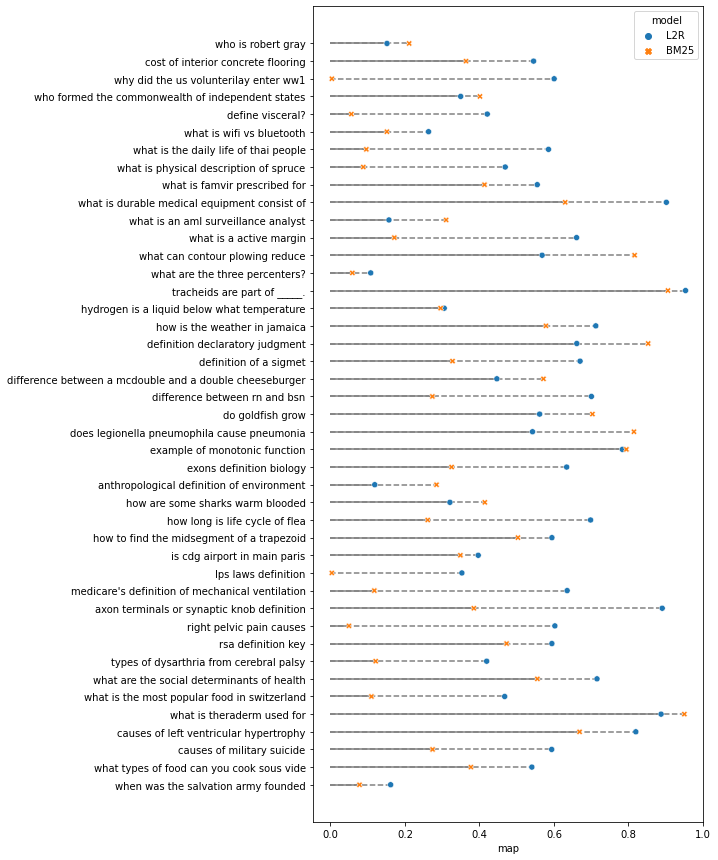

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 15))
# Plotting markers to indicate MAP for each unique query
sns.scatterplot(x='map', y='query', data=merged, hue='model', style='model', zorder=10)

# Creating horizontal lines 
for idx, qid in enumerate(merged.qid.unique()):
    records = merged[merged['qid'] == qid]
    # Dashed line goes to largest value
    largest = records['map'].argmax()
    # Solid line goes to smallest value
    smallest = records['map'].argmin()
    plt.hlines(idx, xmin=0, xmax=records.iloc[largest]['map'], color='grey', linestyles='dashed')
    plt.hlines(idx, xmin=0, xmax=records.iloc[smallest]['map'], color='grey')
    
plt.ylabel('')
plt.show()